<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/notebooks/workshops-regression-classification/linear_reg_1_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression for Diabetes dataset


Import needed libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

Load the diabetes dataset, divided into `X` data and `y` features in a Dataframe format:

- Prompt used in Sapanish for Gemini (inside Google Colab, if you want to keep record of it you need to use it outside via your email account):

"Tú eres un experto en python. Dame el codigo para que al cargar lo siguiente me lo entregue en un dataframe con el nombre original de las columnas (no en arrays): X, y = datasets.load_diabetes(return_X_y=True)"

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Create a DataFrame with the data
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable as a column
df['y'] = diabetes.target

# Print the DataFrame
#print(df)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


- Doc sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes

- TO-DO:
  Explicación de la columnas s1-s6:

  Link: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset



Load the diabetes dataset, divided into `X` data and `y` features (as arrays):

In [ ]:
X, y = datasets.load_diabetes(return_X_y=True)
#(X, y) = datasets.load_diabetes(return_X_y=True)
print(X.shape)
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [ ]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [ ]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
print(y.shape)
print(y[0])

(442,)
151.0


Select just one feature to target for this exercise

In [ ]:
# Selecting the 3rd feature
X = X[:, 2]
print(X.shape)
print(X[0])
X

(442,)
0.061696206518683294


array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
       -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
       -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
       -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
       -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
       -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
        0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
       -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
       -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
       -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
       -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
       -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
       -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
       -0.02452876, -0.01806189, -0.01482845, -0.02991782, -0.04

In [ ]:
#Reshaping to get a 2D array
X = X.reshape(-1, 1)
print(X.shape)
print(X)

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 

Split the training and test data for both `X` and `y`

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)
#(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=0.33)

Select the model and fit it with the training data

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Use test data to predict a line

In [ ]:
y_pred = model.predict(X_test)

# error = y_test - y_pred
# error = y_pred - y_test

- ACLARACIONES SOBRE EL ERROR (diferencia o "residuals"):

```
# error1 = y_pred - y_test
# error2 = y_test - y_pred

# error1 = -error2

# TO-DO: graficar la distribución del error

# error_abs = |y_pred - y_test|
# error_abs = |y_test - y_pred|

# error_sq = (y_pred - y_test)^2
# error_sq = (y_test - y_pred)^2
```



In [ ]:
error2 = y_test - y_pred
error2

array([  52.76711288,    7.11011546,  -74.66164034,   12.20811619,
        105.78548802,   44.57111141, -107.78414126,   61.15911583,
         74.39348508,   17.55273627,  101.42411031,  -37.00626042,
        134.6629871 ,   13.96311435,  -31.99401032,  -45.90213463,
         98.63848692,  -56.12263629,  -66.26963739,  154.81611325,
         16.69361233,    2.93861417,   28.80386316,   72.93861417,
         34.52211104,   12.78548802,  -48.31863776,  -27.87763445,
        -43.15938657,  -57.23288712,   92.96311435,  -44.03526815,
        -20.3370129 ,    9.39961012, -103.24513721,   -7.98176023,
        -31.484014  , -133.63714015,  -78.19613684,  110.85898857,
        -73.60038988,   36.33835966,  -38.24513721,  -27.1103862 ,
         66.57111141,   -8.31251272,   81.11011546,  -59.20226189,
        -68.11651124,    5.49761086,  -55.42888859,  -77.23288712,
         63.40573517,  -33.93888491,  -96.35538804,    7.09174032,
         39.39961012,  -15.951135  ,  -21.0307606 ,   87.06724

(array([ 4., 10., 17., 28., 17., 22., 15., 16., 13.,  4.]),
 array([-133.63714015, -104.79181481,  -75.94648947,  -47.10116413,
         -18.25583879,   10.58948655,   39.43481189,   68.28013723,
          97.12546257,  125.97078791,  154.81611325]),
 <BarContainer object of 10 artists>)

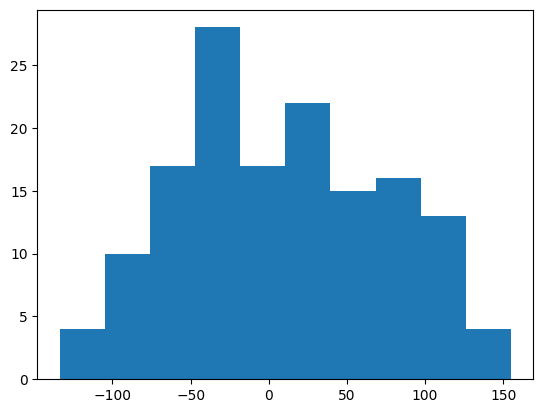

In [ ]:
plt.hist(error2)

Display the results in a plot

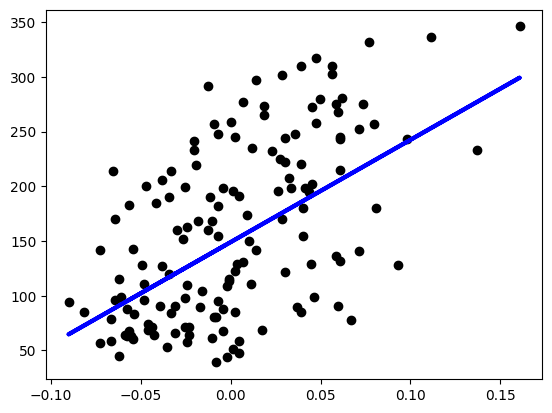

In [ ]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

- TAREA:

Calcular métricas de desempeño del modelo: MSE, RMSE, MAE, r2, entre otros.

**Métricas de desempeño**





In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Calcular el RMSE
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

MSE: 4441.631470295092
RMSE: 66.64556602126726
MAE: 56.314558663847606
R^2: 0.3095049548260097


Podemos concluir que:


MSE(Mean Squared Error): 4444.1 nos indica que, en promedio, el cuadrado de los errores entre los valores predichos y los reales es alto lo que significa que las predicciones se desvian mucho de los valores reales

RMSE(root Mean Squered Error) 66.64 Es muy alto en comparación de los daltos del conjunto de datos, el modelo no esta prediciendo con gran precisión

MAE(Mean Absolute Error): 56.31 esto refleja que las predicciones del modelo estan desviadas en esa magnitud con respecto a los valores reales

R2 (coeficiente de determinación) 0.31 significa que solo el 31% de la variabilidad de datos es explicado por el modelo, lo cual quiere decir que el modelo esta muy por debajo de lo que deberia predecir

**Errores porcentuales**


In [ ]:
# Calcular el MAPE (Error absoluto porcentual medio)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape}%')

MAPE: 45.39553980275215%


MAPE(Mean Absolute porcentage Error) 45.40 Nos onforma que, en promedio las predicciones estan desviadas en un 45% contra los datos reales,  Baja precisión del modelo

**Graficar la distribución de los errores**

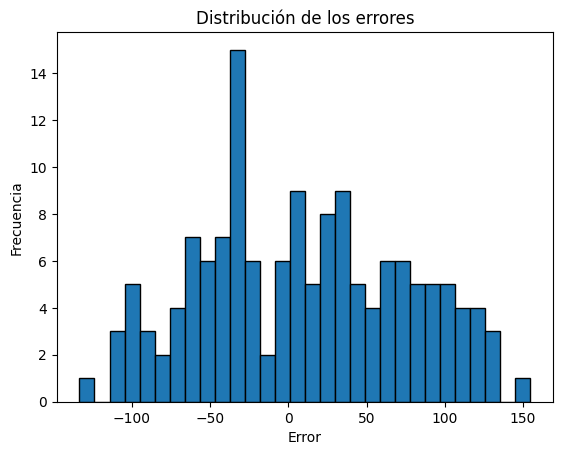

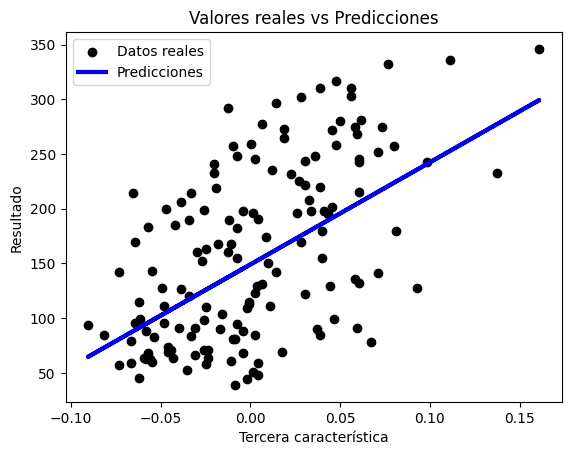

In [ ]:
# Calcular el error (residuals)
error2 = y_test - y_pred

# Graficar el histograma de los errores
plt.hist(error2, bins=30, edgecolor='black')
plt.title('Distribución de los errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

# Graficar los valores reales vs predichos
plt.scatter(X_test, y_test, color='black', label='Datos reales')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicciones')
plt.title('Valores reales vs Predicciones')
plt.xlabel('Tercera característica')
plt.ylabel('Resultado')
plt.legend()
plt.show()